# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [70]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [72]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [73]:
# 1. Remove columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

In [74]:
# 2. Remove rows with missing values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

In [75]:
# 3. Impute missing values in numerical columns with column mean
numerical_columns = data.select_dtypes(include=['number']).columns
for column in numerical_columns:
    mean_value = data[column].mean()
    data[column] = data[column].fillna(mean_value)

In [76]:
# Display the cleaned data
print(data.head())

  ApplicationDate   Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01  45.0         39948          617         Employed   
1      2018-01-02  38.0         39709          628         Employed   
2      2018-01-03  47.0         40724          570         Employed   
3      2018-01-04  58.0         69084          545         Employed   
4      2018-01-05  37.0        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  \
0             19183   3329.000000 

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [77]:
# 1. Remove columns with unique categorical values
for column in categorical_columns:
    if data[column].nunique() == len(data):
        data = data.drop(columns=[column])

In [78]:
# 2. One-hot encode categorical columns
data = pd.get_dummies(data, drop_first=True)

In [79]:
# Display the cleaned data
print(data.head())

    Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0  45.0         39948          617          22       13152            48   
1  38.0         39709          628          15       26045            48   
2  47.0         40724          570          26       17627            36   
3  58.0         69084          545          34       37898            96   
4  37.0        103264          594          17        9184            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2                  183                   0.354418   
1                   1                  496                   0.087827   
2                   2                  902                   0.137414   
3                   1                  755                   0.267587   
4                   1                  274                   0.320535   

   NumberOfOpenCreditLines  ...  MaritalStatus_Married  MaritalStatus_Single  \
0                       

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [80]:
# 1. Specify the label and features
student_id = 48160202 
label = 'LoanApproved'
features = data.drop(columns=[label]) 
target = data[label]

In [81]:
# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=student_id)

In [82]:
# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (15920, 44), (15920,)
Testing set shape: (3980, 44), (3980,)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [83]:
# 1. Train a logistic regression model and predict on the training and testing data
model = LogisticRegression(max_iter=1000, random_state=student_id)
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [84]:
# 2. Calculate accuracy and F1-score for training and testing data
train_accuracy = accuracy_score(y_train, y_train_prediction)
train_f1 = f1_score(y_train, y_train_prediction)

test_accuracy = accuracy_score(y_test, y_test_prediction)
test_f1 = f1_score(y_test, y_test_prediction)

In [85]:
# 3. Compare the results and justify whether the model is overfitting
if train_accuracy > test_accuracy and train_f1 > test_f1:
    print("The model might be overfitting as it performs better on the training data than on the testing data.")
else:
    print("The model does not seem to be overfitting.")

The model does not seem to be overfitting.


In [88]:
# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1-Score: {test_f1:.4f}")

Training Accuracy: 0.8912
Training F1-Score: 0.7558
Testing Accuracy: 0.8955
Testing F1-Score: 0.7606


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visualise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). 
2. Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [97]:
# 1.1 Perform RFE and store the performance metric
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
acc_scores = []
f1_scores = []

Optimal number of features: 24


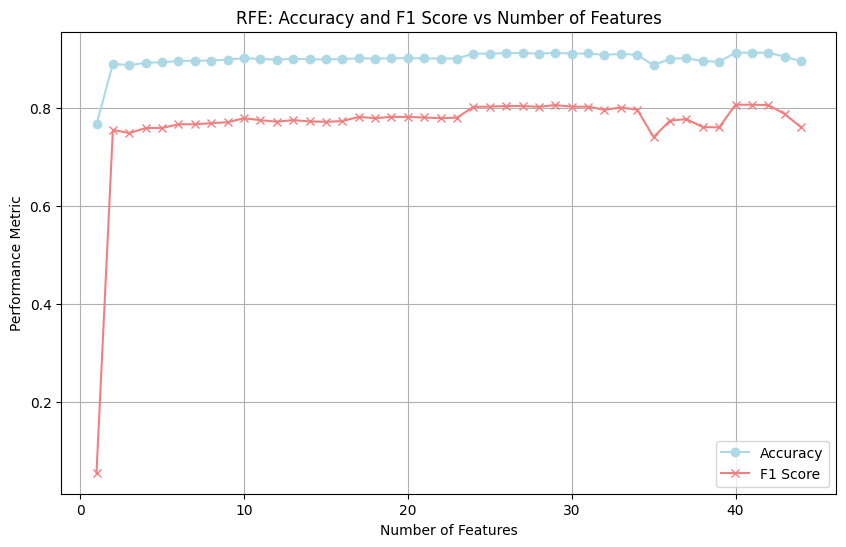

In [98]:
# 1.2 Evaluate the model performance for numbers of features and calculate both scores

for i in range(1, X_train.shape[1] + 1):
    selector = RFE(estimator=model,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    # Calculate accuracy score and F1 score for the predictions on the test set
    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)

    # Append the calculated scores to their respective lists
    acc_scores.append(acc_score)
    f1_scores.append(f1)

#Finding the best accuracy score (index where the accuracy and F1 is highest)
best_acc = 1
for item in acc_scores:
    if item < acc_scores[best_acc - 1]:
        best_acc = acc_scores.index(item) + 1


best_f1 = 1
for item in f1_scores:
    if item < f1_scores[best_f1 - 1]:
        best_f1 = f1_scores.index(item) + 1

# 1.4 Find the optimal features
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)
optimal_features = rfecv.n_features_
print(f"Optimal number of features: {optimal_features}")

# 1.5 plotting the performance metrics with enhanced visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), acc_scores, marker='o', label='Accuracy', color='lightblue')
plt.plot(range(1, X_train.shape[1] + 1), f1_scores, marker='x', label='F1 Score', color='lightcoral')


plt.title('RFE: Accuracy and F1 Score vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Performance Metric')
plt.grid(True)
plt.legend(loc='best')

plt.show()

In [99]:
# 2. Run RFE again with the chosen number of features
rfe = RFE(estimator=model, n_features_to_select=optimal_features)
rfe.fit(X_train, y_train)

retained_features = X_train.columns[rfe.support_]
print(f"Retained Features: {retained_features}")

Retained Features: Index(['LoanDuration', 'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate',
       'TotalDebtToIncomeRatio', 'EmploymentStatus_Self-Employed',
       'EmploymentStatus_Unemployed', 'EducationLevel_Bachelor',
       'EducationLevel_Doctorate', 'EducationLevel_High School',
       'EducationLevel_Master', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [100]:
# 1. Use the retained features from Step 2.3
retained_features = ['LoanDuration', 'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate',
       'TotalDebtToIncomeRatio', 'EmploymentStatus_Self-Employed',
       'EmploymentStatus_Unemployed', 'EducationLevel_Bachelor',
       'EducationLevel_Doctorate', 'EducationLevel_High School',
       'EducationLevel_Master', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other']
X_train = X_train[retained_features]
X_test = X_test[retained_features]

In [101]:
# 2. Build a 1-NN classifier and calculate accuracy and F1-score for training and testing data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_predict)
train_f1 = f1_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)
test_f1 = f1_score(y_test, y_test_predict)

In [102]:
# 3. Compare the results and justify whether the model is overfitting
if train_accuracy > test_accuracy and train_f1 > test_f1:
    print("The model might be overfitting as it performs better on the training data than on the testing data.")
else:
    print("The model does not seem to be overfitting.")

The model might be overfitting as it performs better on the training data than on the testing data.


In [103]:
# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1-Score: {test_f1:.4f}")

Training Accuracy: 1.0000
Training F1-Score: 1.0000
Testing Accuracy: 0.6987
Testing F1-Score: 0.3804


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [104]:
# 1.1 Define the parameter grid for K and initialise the KNN classifier
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()

# 1.2 Perform grid search  and get the results of the grid search, mean test score and corresponding values of K
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
k_values = range(1, 31)

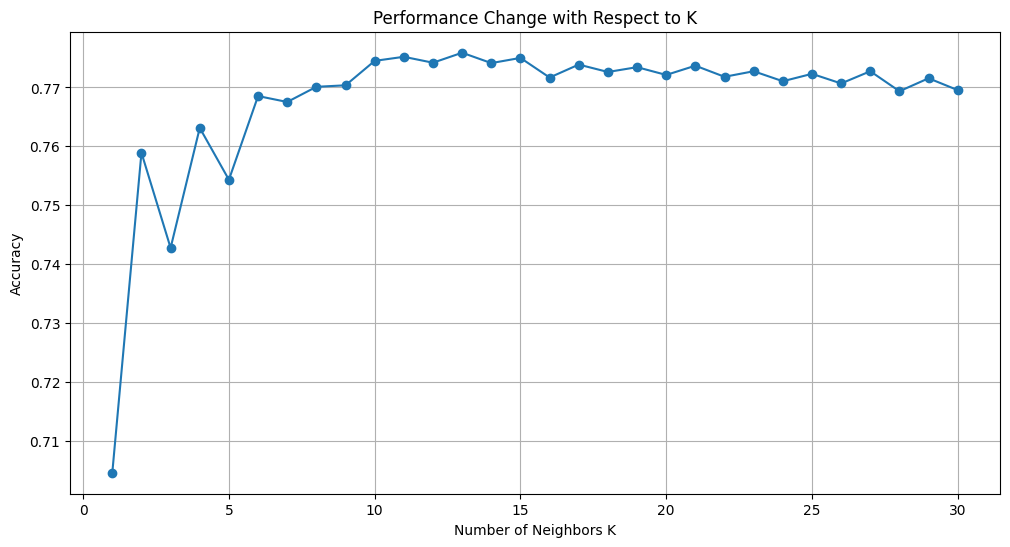

In [105]:
# 2.1 Plot the performance change with respect to K
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('Performance Change with Respect to K')
plt.grid(True)
plt.show()

In [106]:
# 2.2 Get the best K value and its corresponding performance metrics and train the KNN classifier with the best K value
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# 2.3 Predict on the training and testing data
y_train_prediction = best_knn.predict(X_train)
y_test_prediction = best_knn.predict(X_test)

# 2.4 Calculate accuracy and F1-score for training and testing data
train_accuracy = accuracy_score(y_train, y_train_prediction)
train_f1 = f1_score(y_train, y_train_prediction)
test_accuracy = accuracy_score(y_test, y_test_prediction)
test_f1 = f1_score(y_test, y_test_prediction)

In [107]:
# Print the results
print(f"Best K: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1-Score: {test_f1:.4f}")

Best K: 13
Best Cross-Validation Accuracy: 0.7759
Training Accuracy: 0.8048
Training F1-Score: 0.3940
Testing Accuracy: 0.7744
Testing F1-Score: 0.2723


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

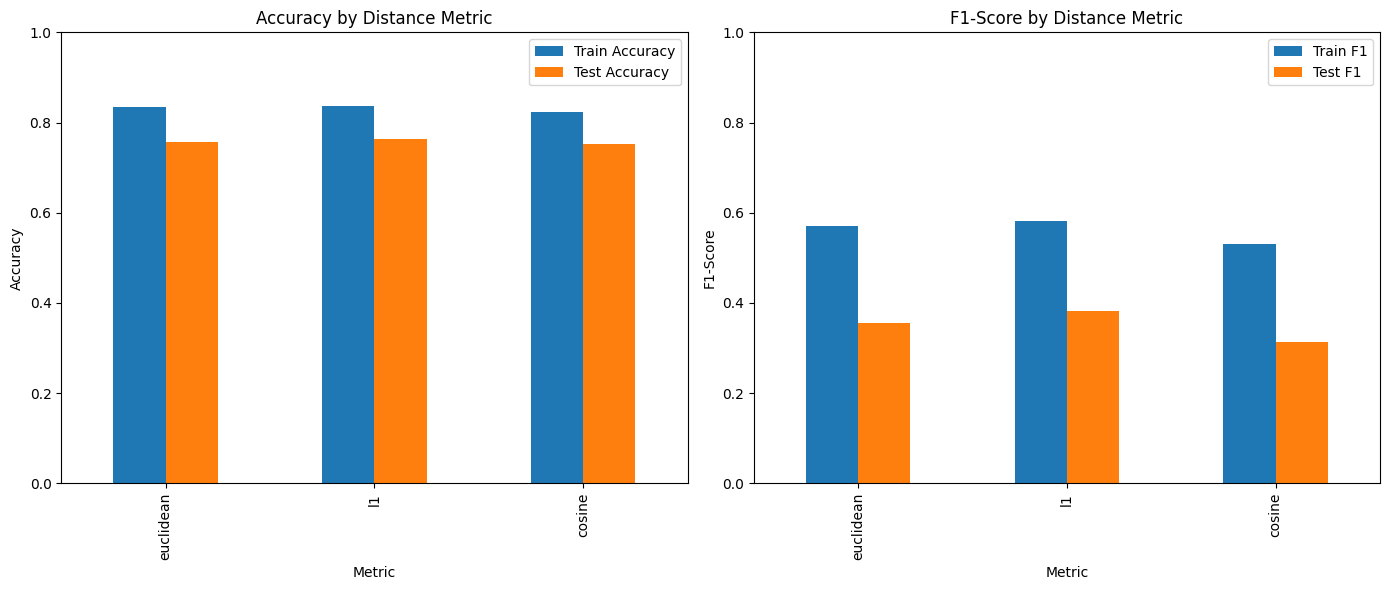

In [108]:
# 1.1 Define the distance metrics 
distance_metrics = ['euclidean', 'l1', 'cosine']
performance_results = {'Metric': [], 'Train Accuracy': [], 'Test Accuracy': [], 'Train F1': [], 'Test F1': []}
#1.2 Evaluate the model performance for each distance metric, predict and calculate training and testing data, and store the results
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric) 
    knn.fit(X_train, y_train)
    
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_predict)
    train_f1 = f1_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_f1 = f1_score(y_test, y_test_predict)
    
    performance_results['Metric'].append(metric)
    performance_results['Train Accuracy'].append(train_accuracy)
    performance_results['Test Accuracy'].append(test_accuracy)
    performance_results['Train F1'].append(train_f1)
    performance_results['Test F1'].append(test_f1)

# 1.3 Convert the results to a DataFrame for easier visualization
performance_df = pd.DataFrame(performance_results)

# 1.4 Plot the performance metrics using Accuracy bar chart and F1-score bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

performance_df.plot(x='Metric', y=['Train Accuracy', 'Test Accuracy'], kind='bar', ax=axes[0])
axes[0].set_title('Accuracy by Distance Metric')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

performance_df.plot(x='Metric', y=['Train F1', 'Test F1'], kind='bar', ax=axes[1])
axes[1].set_title('F1-Score by Distance Metric')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [110]:
# 2. Compare the performance metrics
best_metric = performance_df.loc[performance_df['Test Accuracy'].idxmax(), 'Metric']
worst_metric = performance_df.loc[performance_df['Test Accuracy'].idxmin(), 'Metric']

print(f"The best distance metric is: {best_metric}")
print(f"The worst distance metric is: {worst_metric}")

The best distance metric is: l1
The worst distance metric is: cosine
